# Project Overview

## Context
<p> This data set is created only for the learning purpose of the customer segmentation concepts, also known as market basket analysis. </p>

## Problem Statement
<p> You are owing a supermarket mall and through membership cards, you have some basic data about your customers and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly. </p>

## Data Sets

The data is contained in one file:

* Mall_Costumers.csv - demographic data for each costumer and score

Here is the schema and explanation of each variable in the file:
* CostumerID - costumer id
* Gender - costumer gender
* Age - age of the costumer
* Annual Income (k$) - costumer's annual income
* Spending Score (1-100) - costumer's score based on behavior and purchansing data (higher the score, higher will be the customer expense)

# Libraries

In [340]:
# import libraries
import pandas as pd
import numpy as np

import math

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder

# plot
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Reading

In [228]:
# read in the json files
df = pd.read_csv('data/Mall_Customers.csv')

In [229]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data processing

In [230]:
# changing column names
df = df.rename(columns=
               {'CustomerID': 'USER_ID',
                'Gender': 'GENDER',
                'Age': 'AGE', 
                'Annual Income (k$)': 'ANNUAL_INCOME', 
                'Spending Score (1-100)': 'SPENDING_SCORE'})

#create age group column
df['AGE_GROUP'] = pd.cut(df['AGE'], 
                         bins=[17, 30, 40, 50, 60, 70],
                         labels=['18-30', '31-40', '41-50', '51-60', '61+'])

In [231]:
df.head()

,USER_ID,GENDER,AGE,ANNUAL_INCOME,SPENDING_SCORE,AGE_GROUP
0,1,Male,19,15,39,18-30
1,2,Male,21,15,81,18-30
2,3,Female,20,16,6,18-30
3,4,Female,23,16,77,18-30
4,5,Female,31,17,40,31-40


# Data Anaylsis

In [232]:
df.describe()

,USER_ID,AGE,ANNUAL_INCOME,SPENDING_SCORE
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


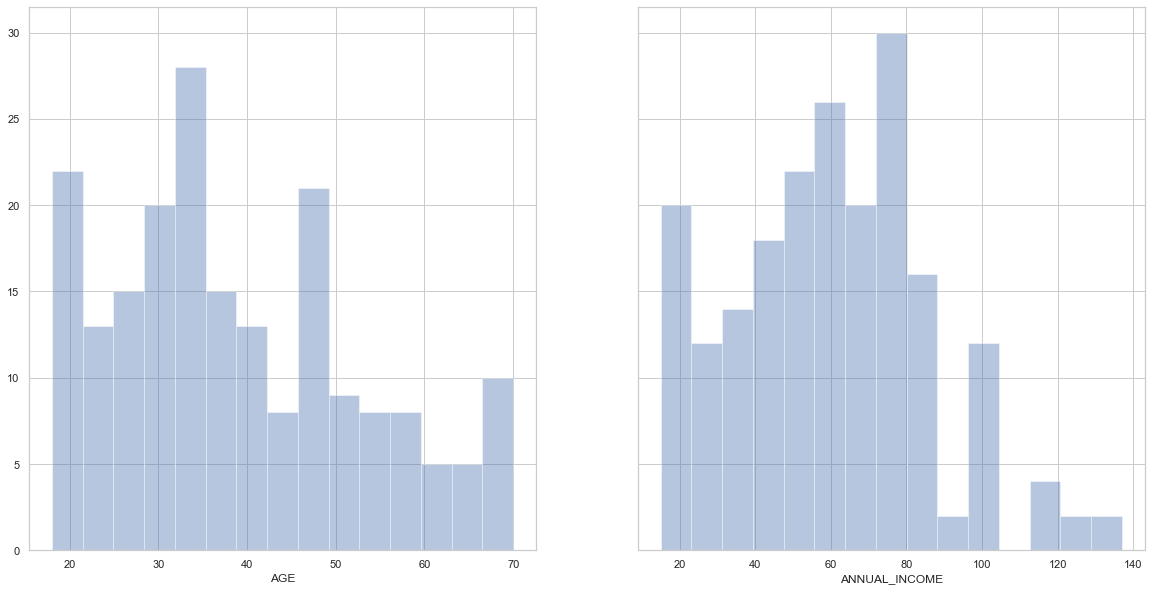

In [233]:
#users age and income
fig, ax = plt.subplots(1,2, sharey=True)

fig.set_size_inches(20,10)

#plot income histogram
income_hist = df.groupby(['USER_ID'])['AGE'].mean()
sns.distplot(income_hist,ax=ax[0], kde=False, bins=15);

#plot income histogram
income_hist = df.groupby(['USER_ID'])['ANNUAL_INCOME'].mean()
sns.distplot(income_hist, ax=ax[1], kde=False, bins=15);

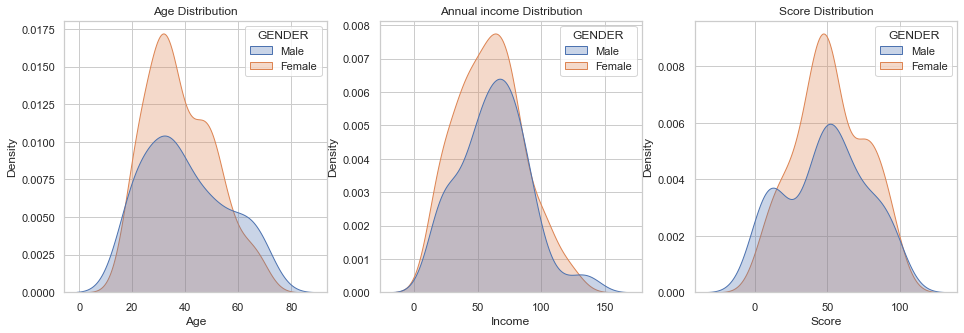

In [234]:
#age and income distribuction by gender
fig, ax = plt.subplots(1,3)
fig.set_size_inches(16,5)

# age distribution
sns.kdeplot(data=df, x='AGE', hue='GENDER', fill=True, ax=ax[0], alpha=0.3)
ax[0].set_title('Age Distribution', fontsize=12)
ax[0].set_xlabel('Age', fontsize=12)

# annual income distribution
sns.kdeplot(data=df, x='ANNUAL_INCOME', hue='GENDER', fill=True, ax=ax[1], alpha=0.3)
ax[1].set_title('Annual income Distribution', fontsize=12)
ax[1].set_xlabel('Income', fontsize=12)

# score distribution
sns.kdeplot(data=df, x='SPENDING_SCORE', hue='GENDER', fill=True, ax=ax[2], alpha=0.3)
ax[2].set_title('Score Distribution', fontsize=12)
ax[2].set_xlabel('Score', fontsize=12)

plt.show()

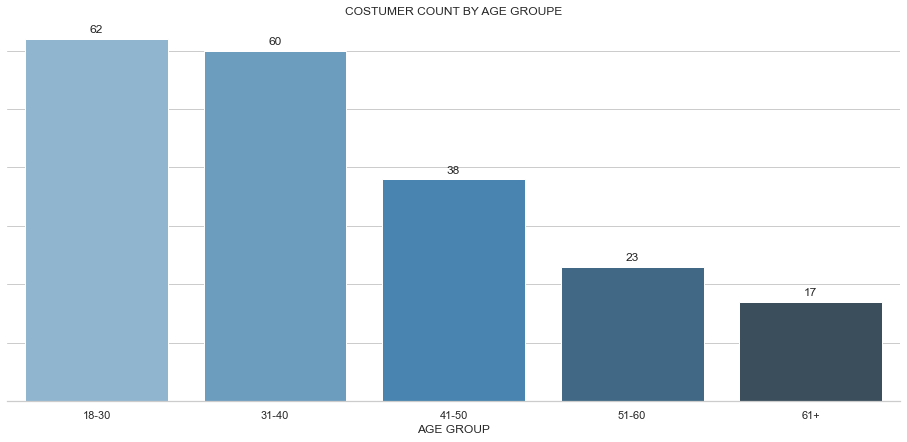

In [235]:
#show the sucess rate by offer
plt.figure(figsize=(16, 7))

#plot
#splot = sns.barplot(data=gender_age_sucess, x='variable', y='sucess', hue='gender', palette='Blues_d',ci=False)
splot = sns.countplot(x='AGE_GROUP', data=df, palette='Blues_d')

#labels and title
plt.xlabel('AGE GROUP', fontsize=12)
plt.title('COSTUMER COUNT BY AGE GROUPE', fontsize=12)

#hide borders, background and labels
sns.despine(left = True) #hide borders
sns.set_style("white") #set white background
splot.set(ylabel=None)  # remove the axis label
splot.set(yticklabels=[])  # remove the tick labels

#add annotations on each bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

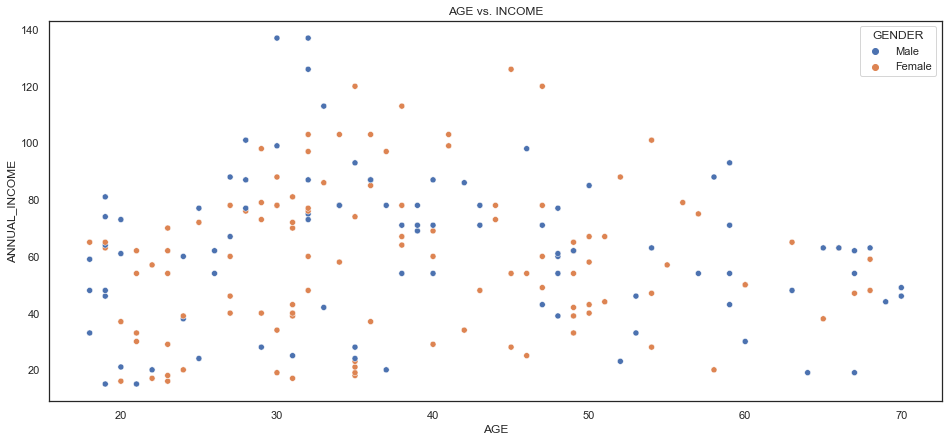

In [236]:
#show the sucess rate by offer
plt.figure(figsize=(16, 7))

#plot
#splot = sns.barplot(data=gender_age_sucess, x='variable', y='sucess', hue='gender', palette='Blues_d',ci=False)
splot = sns.scatterplot(data=df, x="AGE", y="ANNUAL_INCOME", hue="GENDER")

#labels and title
plt.title('AGE vs. INCOME', fontsize=12)

#hide borders, background and labels
sns.set_style("whitegrid") #set white background

plt.show()

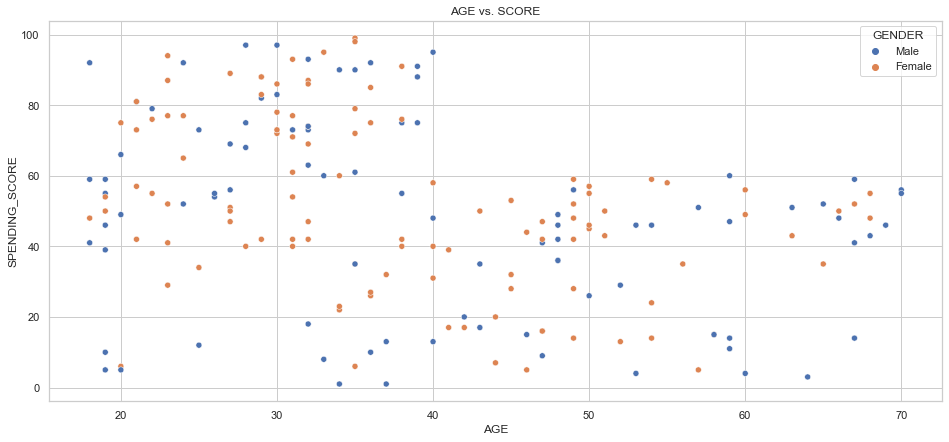

In [237]:
plt.figure(figsize=(16, 7))

#plot
splot = sns.scatterplot(data=df, x="AGE", y="SPENDING_SCORE", hue="GENDER")

#labels and title
plt.title('AGE vs. SCORE', fontsize=12)

#hide borders, background and labels
sns.set_style("whitegrid") #set white background

plt.show()

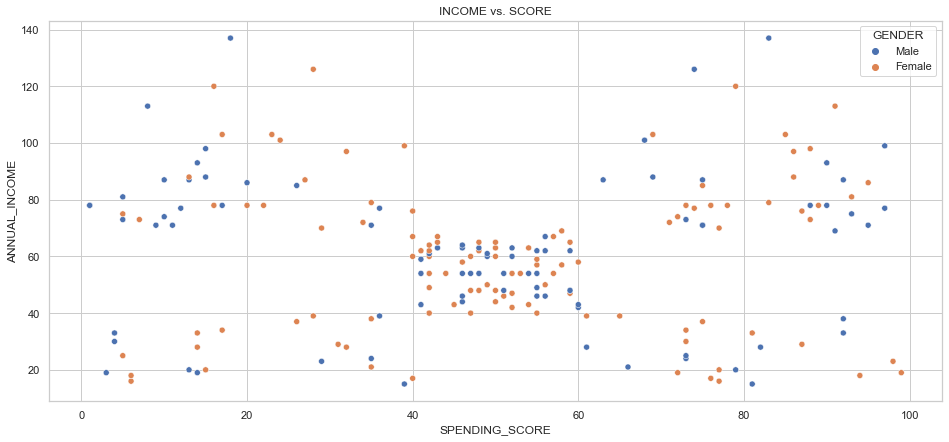

In [238]:
#show the sucess rate by offer
plt.figure(figsize=(16, 7))

#plot
#splot = sns.barplot(data=gender_age_sucess, x='variable', y='sucess', hue='gender', palette='Blues_d',ci=False)
splot = sns.scatterplot(data=df, x="SPENDING_SCORE", y="ANNUAL_INCOME", hue="GENDER")

#labels and title
plt.title('INCOME vs. SCORE', fontsize=12)

#hide borders, background and labels
sns.set_style("whitegrid") #set white background

plt.show()

In [356]:
def calculate_inertias(data):
    '''
    
    '''
    
    inertias = []
    mapping1 = {}
    mapping2 = {}
    K = range(1, 10)

    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(data)
        kmeanModel.fit(data)

        inertias.append(kmeanModel.inertia_)
        
        mapping1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                           'euclidean'), axis=1)) / data.shape[0]
        mapping2[k] = kmeanModel.inertia_
        
    return inertias, mapping1, mapping2

In [364]:
def optimal_number_of_clusters(inertias):
    '''
    Find the best number of clusters
    
    INPUT:
    
    '''
    x1, y1 = 1, inertias[0]
    x2, y2 = 9, inertias[len(inertias)-1]

    distances = []
    for i in range(len(inertias)):
        x0 = i+2
        y0 = inertias[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2, x1, y1, x2, y2

In [365]:
score_age_data = df[['AGE', 'SPENDING_SCORE']].to_numpy()
income_age_data = df[['AGE', 'ANNUAL_INCOME']].to_numpy()
income_score_data = df[['SPENDING_SCORE', 'ANNUAL_INCOME']].to_numpy()

inertias, mapping1, mapping2 = calculate_inertias(income_score_data)
n, x1, y1, x2, y2 = optimal_number_of_clusters(inertias)

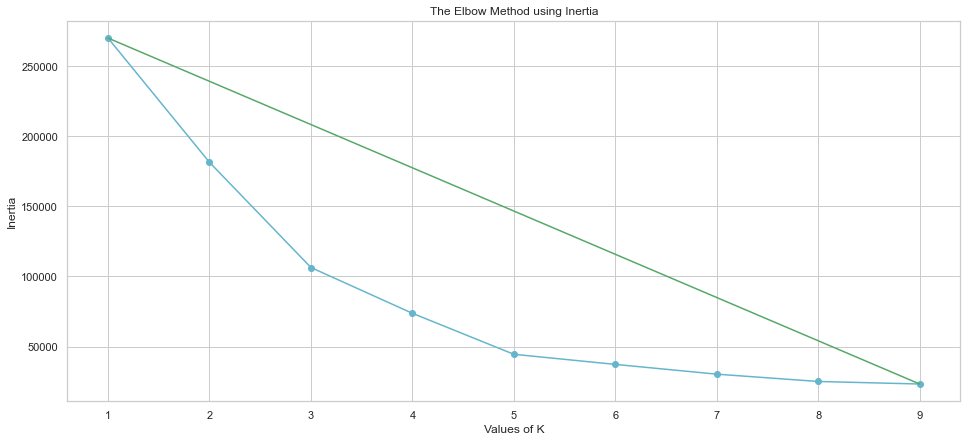

In [366]:
plt.figure(figsize=(16, 7))

plt.plot(K, inertias, 'c-o')
plt.plot([x2, x1], [y2,y1], color='g') # linha verde

plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

plt.show()

In [367]:
df.head()
teste = df[['AGE', 'ANNUAL_INCOME', 'SPENDING_SCORE', 'USER_ID']]

In [368]:
# inicializando o kmeans para nossa quantidade ótima de clusters
kmeans = KMeans(n_clusters=n)

In [369]:
# predizendo nossos clusters
teste['clusters'] = kmeans.fit_predict(teste)

In [370]:
# transformando as especies de iris em numeros para colorir o gráfico
teste['USER_ID_encoded'] = LabelEncoder().fit_transform(df['USER_ID'])

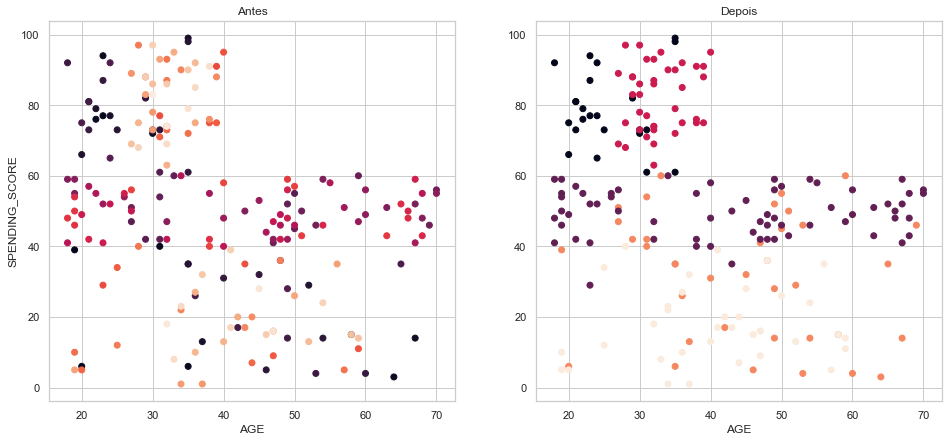

In [372]:
plt.figure(figsize=(16,7))

plt.subplot(1, 2, 1)
plt.title('Antes')
plt.xlabel('AGE')
plt.ylabel('SPENDING_SCORE')
plt.scatter(teste['AGE'], teste['SPENDING_SCORE'], c=teste['USER_ID_encoded'])


plt.subplot(1, 2, 2)
plt.title('Depois')
plt.xlabel('AGE')
plt.scatter(teste['AGE'], teste['SPENDING_SCORE'], c=teste['clusters'])

plt.show()